(720, 1280)


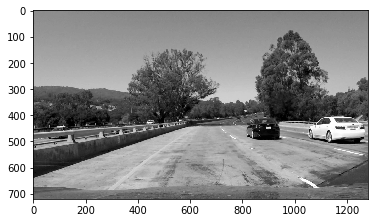

In [43]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 28 10:59:48 2018

@author: Pranjal Vithlani
"""


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
print(gray.shape)


[[237 239 203 ...  31  34  45]
 [239 192 154 ... 101  71  28]
 [200 152 146 ... 134 127  88]
 ...
 [134 124 104 ...  85  85  99]
 [157 125 110 ...  93  95  97]
 [182 128 120 ...  83  81  59]]
[[239 241 209 ...  34  37  50]
 [241 199 164 ... 113  81  33]
 [207 162 157 ... 148 140 101]
 ...
 [142 132 111 ...  91  91 106]
 [164 133 117 ... 100 102 104]
 [188 136 128 ...  89  87  63]]


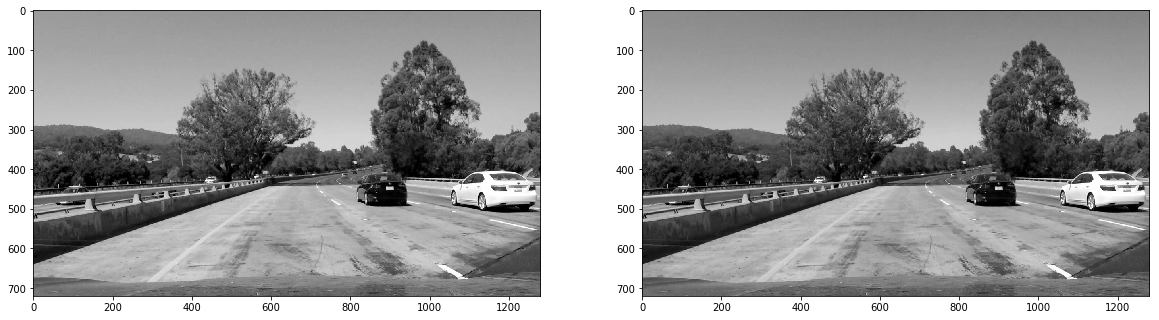

In [45]:
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

f, axarr = plt.subplots(1,2, figsize=(20,10))
axarr[0].imshow(lab[:,:,0], cmap='gray')
axarr[1].imshow(gray, cmap='gray')

print(gray)
print(lab[:,:,0])

In [ ]:

# this code is not working, it is just to give you a gist

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 256
epochs = 12

# input image dimensions
img_rows, img_cols = 256, 256

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
